## Evaluate Custom KMeans vs SciPy KMeans on Normalized RFM Data

In [246]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [247]:
# 2. Load data
rfm = pd.read_csv('rfm_normalized.csv')
results = pd.read_csv('rfm_clustering_results.csv')

In [248]:
# Ensure CustomerID alignment
assert rfm['CustomerID'].equals(results['CustomerID']), "CustomerID mismatch between files"

In [249]:
# Extract features and cluster labels
X = rfm[['Recency_z', 'Frequency_z', 'Monetary_z']].values
custom_labels = results['Cluster'].values
k = len(np.unique(custom_labels))

In [250]:
print(f"Number of clusters from custom implementation: {k}")

Number of clusters from custom implementation: 3


In [251]:
# 3. Run SciPy KMeans
# We use kmeans2 which returns centroids and labels
centroids, scipy_labels = kmeans2(X, k, minit='++')  # k-means++ initialization

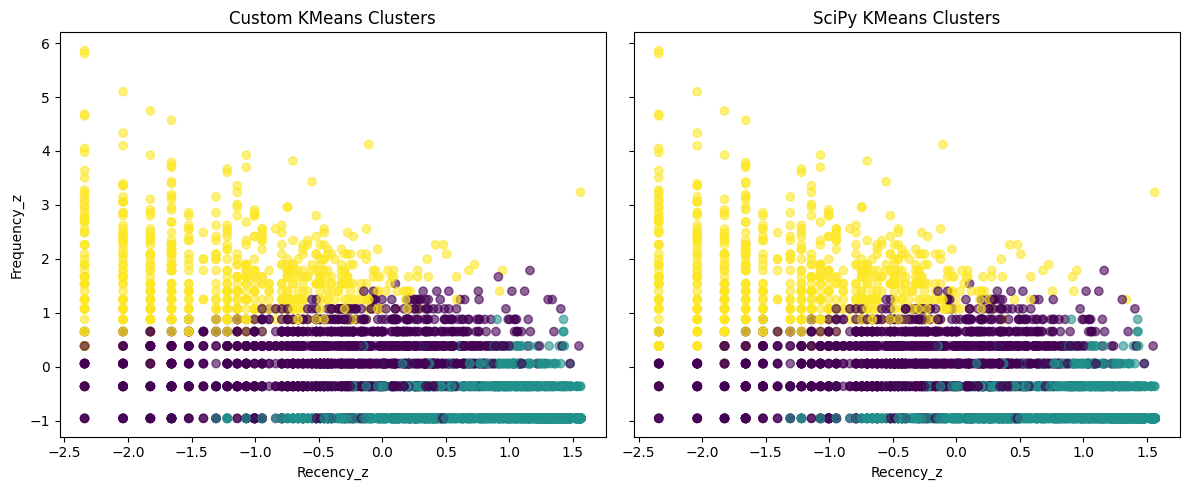

In [252]:
# 4. Visual Comparison
## 2D Scatter of Recency_z vs Frequency_z
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
axes[0].scatter(X[:, 0], X[:, 1], c=custom_labels, cmap='viridis', alpha=0.6)
axes[0].set_title('Custom KMeans Clusters')
axes[0].set_xlabel('Recency_z')
axes[0].set_ylabel('Frequency_z')
axes[1].scatter(X[:, 0], X[:, 1], c=scipy_labels, cmap='viridis', alpha=0.6)
axes[1].set_title('SciPy KMeans Clusters')
axes[1].set_xlabel('Recency_z')
plt.tight_layout()
plt.show()

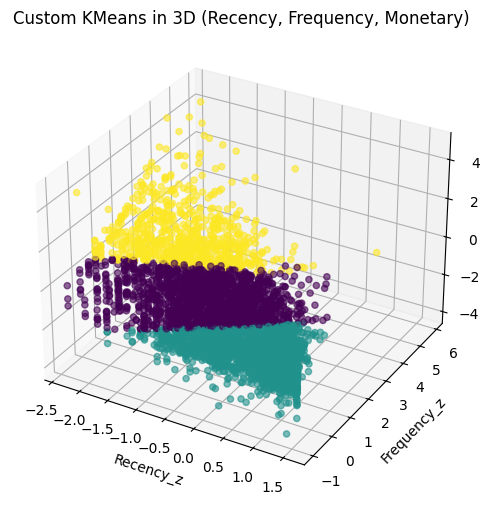

In [253]:
## 3D Scatter for full RFM
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=custom_labels, alpha=0.6)
ax.set_title('Custom KMeans in 3D (Recency, Frequency, Monetary)')
ax.set_xlabel('Recency_z')
ax.set_ylabel('Frequency_z')
ax.set_zlabel('Monetary_z')
plt.show()

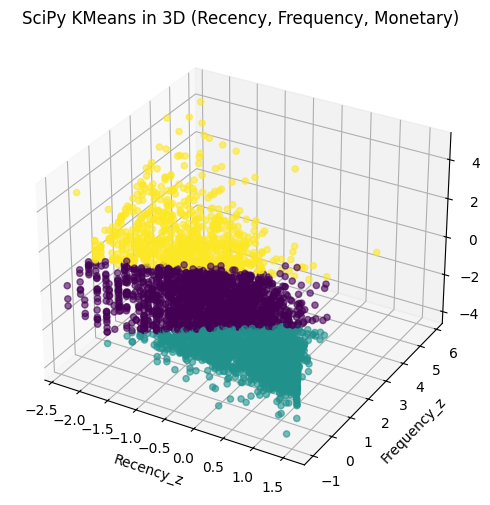

In [254]:
## 3D Scatter for full RFM
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=scipy_labels, alpha=0.6)
ax.set_title('SciPy KMeans in 3D (Recency, Frequency, Monetary)')
ax.set_xlabel('Recency_z')
ax.set_ylabel('Frequency_z')
ax.set_zlabel('Monetary_z')
plt.show()

In [255]:
# 5. Statistical Comparison
metrics = {
    'Method': ['Custom KMeans', 'SciPy KMeans'],
    'Silhouette Score': [
        silhouette_score(X, custom_labels),
        silhouette_score(X, scipy_labels)
    ]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Method,Silhouette Score
0,Custom KMeans,0.339485
1,SciPy KMeans,0.335729


In [256]:
results['SciPy Cluster'] = scipy_labels
print(results.head())

   CustomerID  Recency_z  Frequency_z  Monetary_z  Cluster  SciPy Cluster
0       12346   1.461993    -0.955214    3.706225        0              0
1       12347  -2.038734     1.074425    1.411843        2              2
2       12348   0.373104     0.386304    0.716489        0              0
3       12349  -0.623086    -0.955214    0.698739        0              0
4       12350   1.424558    -0.955214   -0.618962        1              1


In [257]:
print(results['Cluster'].value_counts())
print(results['SciPy Cluster'].value_counts())

Cluster
1    1919
0    1693
2     726
Name: count, dtype: int64
SciPy Cluster
1    1861
0    1699
2     778
Name: count, dtype: int64


In [258]:
count = 0
for i in range(len(results)):
    if results['Cluster'][i] != results['SciPy Cluster'][i]:
        count += 1
print(count)

print(count/len(results))

110
0.025357307514983864
